In [2]:
import gcsfs
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
fs = gcsfs.GCSFileSystem()

In [4]:
flut_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/cam6_pd_monthly_flut_ppe.zarr')

In [5]:
fs.ls('gs://leap-persistent/kylemcevoy')

['leap-persistent/kylemcevoy/amip_prec_q90.zarr',
 'leap-persistent/kylemcevoy/cam6_pd_monthly_flut_ppe.zarr',
 'leap-persistent/kylemcevoy/ceres_toa.zarr',
 'leap-persistent/kylemcevoy/cesm2_le50_prec_quantile090.nc',
 'leap-persistent/kylemcevoy/cesm2_le50_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_le_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_ppe_param_set.zarr']

In [6]:
cam6_flut_ppe = xr.open_dataset(flut_mapper, engine='zarr')

In [4]:
ceres_toa_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/ceres_toa.zarr')

In [5]:
ceres_toa = xr.open_dataset(ceres_toa_mapper, engine = 'zarr')

In [6]:
ceres_toa

<xarray.Dataset> Size: 150MB
Dimensions:            (lat: 180, lon: 360, time: 289)
Coordinates:
  * lat                (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                (lon) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * time               (time) datetime64[ns] 2kB 2000-03-15 ... 2024-03-15
Data variables:
    toa_net_all_mon    (time, lat, lon) float32 75MB ...
    toa_net_clr_c_mon  (time, lat, lon) float32 75MB ...
Attributes:
    Conventions:  CF-1.4
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2
    comment:      Climatology from 07/2005 to 06/2015
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    version:      Edition 4.2; Release Date December 9, 2022

In [10]:
ceres_toa['toa_net_all_mon']

<xarray.DataArray 'toa_net_all_mon' (time: 289, lat: 180, lon: 360)> Size: 75MB
[18727200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2024-03-15
Attributes:
    CF_name:        toa_net_downward_flux
    comment:        none
    long_name:      Top of The Atmosphere Net Flux, All-Sky conditions, Month...
    standard_name:  TOA Net Flux - All-Sky
    units:          W m-2
    valid_max:            400.000
    valid_min:           -400.000

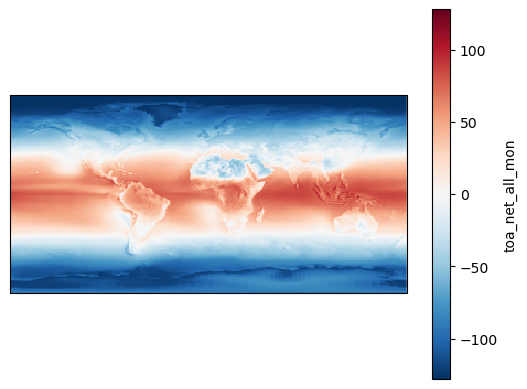

In [11]:
ceres_toa['toa_net_all_mon'].mean('time').plot(subplot_kws={'projection': ccrs.PlateCarree()})

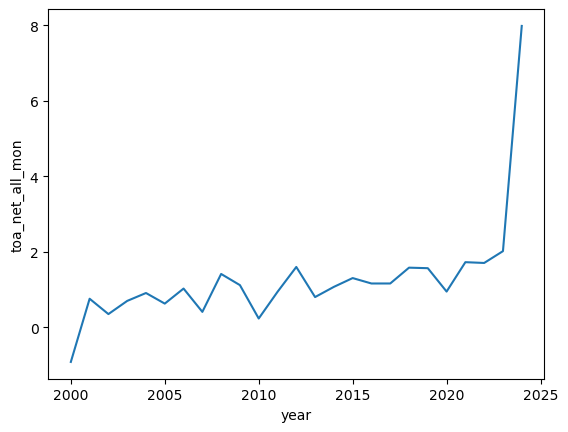

In [36]:
cos_weights = np.cos(np.radians(ceres_toa['lat']))
ceres_weighted_mean = ceres_toa.weighted(cos_weights).mean(dim =('lat', 'lon'))
ceres_weighted_mean = ceres_weighted_mean.groupby('time.year').mean()
ceres_weighted_mean['toa_net_all_mon'].plot()

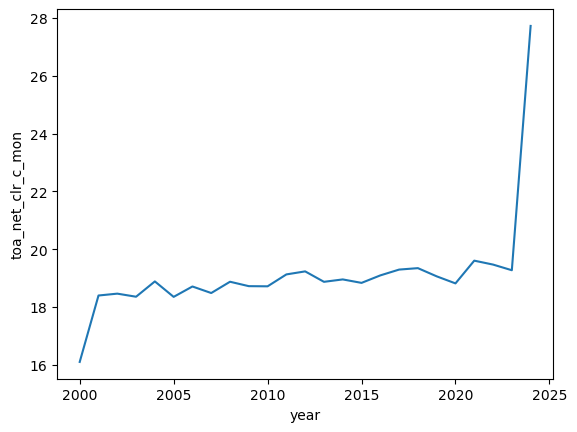

In [37]:
ceres_weighted_mean['toa_net_clr_c_mon'].plot()

In [20]:
!ls CERES*

CERES_EBAF-TOA_Ed4.2_Subset_200003-202403.nc


In [7]:
ceres_glob_mean = xr.open_mfdataset('CERES*.nc').load()

In [8]:
ceres_glob_mean

<xarray.Dataset> Size: 7kB
Dimensions:             (time: 289)
Coordinates:
  * time                (time) datetime64[ns] 2kB 2000-03-15 ... 2024-03-15
Data variables:
    gtoa_lw_all_mon     (time) float32 1kB 238.3 238.0 240.8 ... 239.2 239.2
    gtoa_net_all_mon    (time) float32 1kB 5.956 1.931 -5.93 ... 8.668 6.596
    gtoa_lw_clr_c_mon   (time) float32 1kB 266.3 267.2 269.5 ... 266.5 267.0
    gtoa_net_clr_c_mon  (time) float32 1kB 22.65 15.02 7.652 ... 28.51 23.54
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.2; Release Date December 9, 2022
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2

In [8]:
ceres_glob_mean['gtoa_net_all_mon']

<xarray.DataArray 'gtoa_net_all_mon' (time: 289)> Size: 1kB
array([  5.9564,   1.9306,  -5.9297, -10.2302,  -8.7086,  -5.2125,
        -0.8999,   1.6594,   4.1521,   6.0059,   9.7788,   8.9705,
         7.5392,   1.0013,  -6.1147,  -9.7254,  -8.6728,  -6.0959,
         0.0122,   1.0953,   3.5733,   5.1559,   7.8197,   8.0445,
         6.4967,   0.6994,  -5.565 , -10.1121, -10.167 ,  -6.5795,
        -1.1693,   2.5889,   3.5199,   6.0464,   7.6157,   8.8461,
         6.4087,   1.2901,  -6.0077,  -9.4374,  -8.9138,  -4.725 ,
        -0.5925,   1.5894,   3.748 ,   6.0146,   8.6402,   9.0947,
         5.5675,   2.3589,  -6.4754, -10.4877,  -7.8542,  -5.1977,
        -0.036 ,   1.3618,   4.1835,   7.187 ,   8.0402,   7.8189,
         6.6128,   1.1222,  -4.315 ,  -9.9074,  -9.8501,  -5.9425,
        -0.6553,   1.4922,   3.5698,   6.9954,   8.978 ,   9.1915,
         6.604 ,   2.3983,  -4.2273,  -9.2047,  -9.3288,  -5.8106,
        -0.4946,   1.2167,   4.3383,   6.0945,   6.915 ,   8.5527,
         5.8775,   1.9052,  -5.6238,  -8.6986,  -8.8584,  -5.7081,
        -1.7603,   1.6373,   3.0553,   5.0574,   8.5647,   8.4072,
         7.5593,   1.7878,  -4.1591,  -8.6267,  -8.0898,  -3.8708,
        -0.7073,   2.6577,   3.5168,   7.3395,   8.6768,   9.2914,
         7.4276,   1.8908,  -4.4003,  -7.5323,  -8.826 ,  -5.0384,
        -1.3918,   1.542 ,   2.9303,   6.2619,   6.6626,   8.0752,
...
        -0.1831,   2.2261,   4.0975,   5.8518,   7.4084,   9.2112,
         7.0971,   2.3154,  -4.2973,  -8.8988,  -8.0542,  -4.2137,
         0.2138,   2.2949,   3.9035,   6.1186,   7.9966,   7.3134,
         6.3224,   1.4809,  -4.8927,  -7.5322,  -8.1852,  -4.6382,
        -0.238 ,   2.0437,   4.818 ,   6.8742,   9.2767,   9.7083,
         7.2488,   1.9281,  -5.214 ,  -8.436 ,  -8.1038,  -5.0741,
        -1.0438,   1.3628,   4.0094,   5.697 ,   8.8505,   9.1583,
         6.707 ,   2.9942,  -4.4148,  -9.555 ,  -8.5374,  -4.8036,
         0.4242,   2.9821,   5.1178,   7.4669,   8.6613,   9.4515,
         7.3482,   2.1889,  -4.408 ,  -8.4014,  -8.1717,  -4.9661,
         0.0213,   3.4944,   4.745 ,   6.2539,   8.1768,   8.4127,
         7.0201,   2.4016,  -4.7418,  -8.8775,  -8.4319,  -4.2007,
        -0.698 ,   1.427 ,   3.0211,   5.2937,   8.166 ,   8.8854,
         7.6948,   2.9608,  -4.3652,  -7.2876,  -8.0194,  -4.1263,
         0.407 ,   2.5637,   4.9966,   6.2549,   9.253 ,   9.4367,
         7.3783,   1.7816,  -5.2852,  -7.3964,  -8.6702,  -3.8837,
         0.2162,   2.7373,   4.6527,   7.666 ,   9.5429,   9.9812,
         8.2439,   3.8682,  -3.3656,  -7.9948,  -8.0237,  -4.1107,
         0.0894,   2.2029,   4.4524,   6.7361,   7.9547,   8.6678,
         6.5961], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2024-03-15
Attributes:
    long_name:      Top of The Atmosphere Net Flux, All-Sky conditions, Month...
    standard_name:  TOA Net Flux - All-Sky
    CF_name:        toa_net_downward_flux
    comment:        none
    units:          W m-2
    valid_min:           -400.000
    valid_max:            400.000

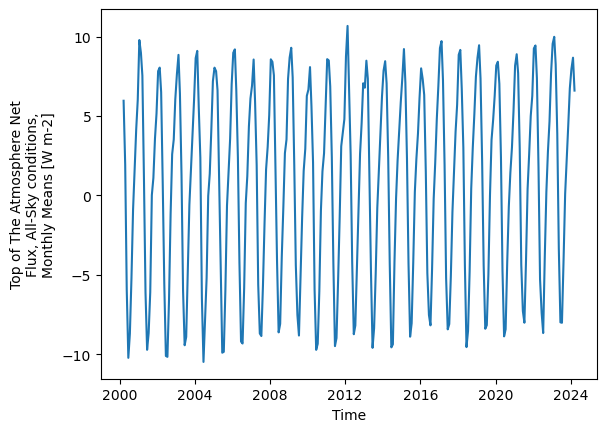

In [43]:
ceres_glob_mean['gtoa_net_all_mon'].plot()

In [12]:
ceres_glob_mean_ann = ceres_glob_mean.sel(time=slice('2000','2023')).groupby('time.year').mean()

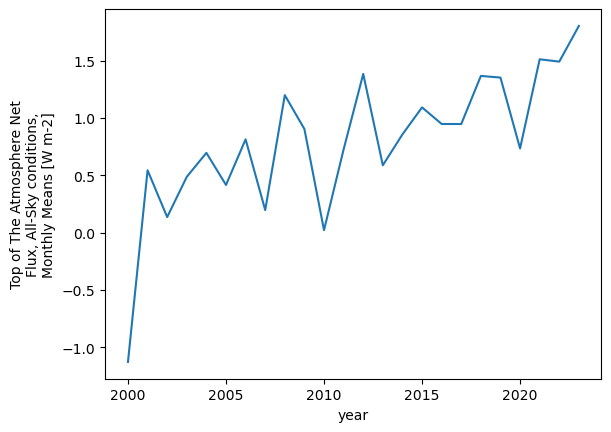

In [45]:
ceres_glob_mean_ann['gtoa_net_all_mon'].plot()

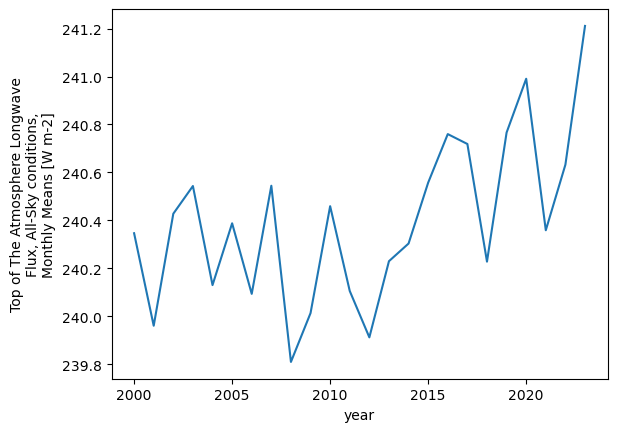

In [46]:
ceres_glob_mean_ann['gtoa_lw_all_mon'].plot()

In [13]:
ceres_good_slice = ceres_glob_mean_ann['gtoa_lw_all_mon'].sel(year=slice('2000', '2010'))

In [14]:
ceres_OLR_mean = ceres_good_slice.values.mean()

In [15]:
ceres_OLR_sd = ceres_good_slice.values.std()

In [7]:
cam_flut_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/cam6_pd_monthly_flut_ppe.zarr')

In [16]:
cam6_flut_ppe = xr.open_dataset(cam_flut_mapper, engine = 'zarr')

NameError: name 'cam_flut_mapper' is not defined

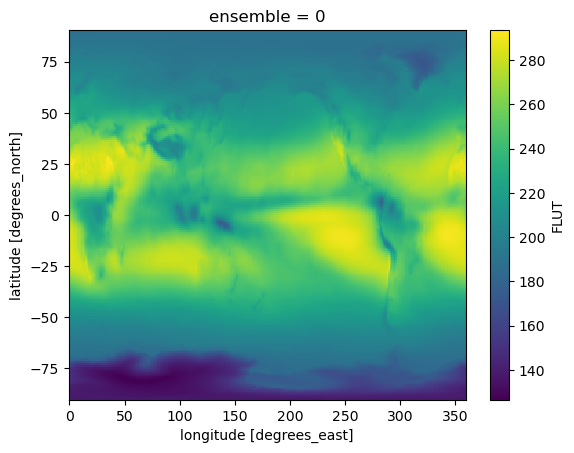

In [22]:
cam6_flut_ppe['FLUT'].sel(ensemble = 0).mean('time').plot()

In [23]:
cam6_flut_ppe

<xarray.Dataset> Size: 2GB
Dimensions:   (ensemble: 262, time: 36, lat: 192, lon: 288)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Data variables:
    FLUT      (ensemble, time, lat, lon) float32 2GB ...

In [23]:
cam6_flut_ppe.sel(ensemble = 200)

<xarray.Dataset> Size: 8MB
Dimensions:   (time: 36, lat: 192, lon: 288)
Coordinates:
    ensemble  int64 8B 200
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Data variables:
    FLUT      (time, lat, lon) float32 8MB 177.1 177.1 177.1 ... 161.0 161.0

In [9]:
cosine_weights = np.cos(np.radians(cam6_flut_ppe['lat']))
cam_flut_weighted = cam6_flut_ppe.weighted(cosine_weights)

In [10]:
cam_flut_avg = cam_flut_weighted.mean(dim = ('lat', 'lon'))
cam_flut_avg = cam_flut_avg.mean(dim='time')

In [12]:
cam_flut_avg.to_netcdf('cam6_ppe_flut_avg.nc')

Text(0.5, 1.0, 'ppe ensemble member global avg. OLR (mean over the 3 years)')

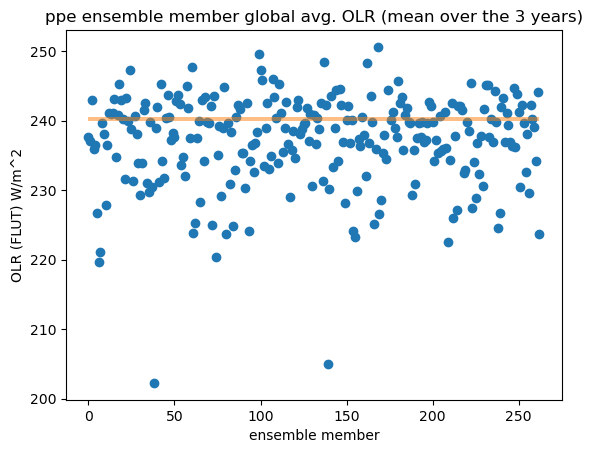

In [21]:
plt.scatter(cam_flut_avg['ensemble'], cam_flut_avg['FLUT'])
plt.fill_between(np.arange(0, 263), ceres_OLR_mean - ceres_OLR_sd, ceres_OLR_mean + ceres_OLR_sd, alpha = 0.5)
plt.xlabel('ensemble member')
plt.ylabel('OLR (FLUT) W/m^2')
plt.title('ppe ensemble member global avg. OLR (mean over the 3 years)')
#plt.savefig('ppe_ensemble_avg_OLR.png')

In [17]:
ceres_OLR_mean

240.24693

In [9]:
cam_flut_avg = xr.open_dataset('cam6_ppe_flut_avg.nc')

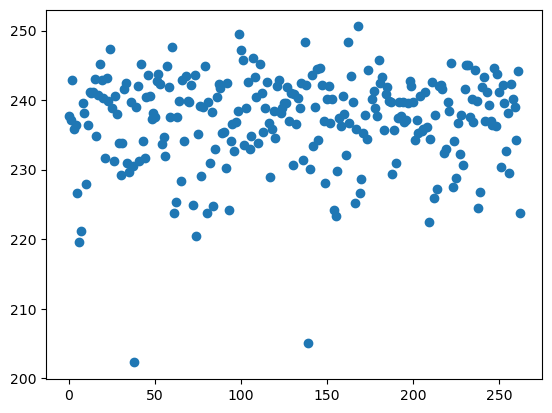

In [17]:
plt.scatter(np.delete(np.arange(263), 175), cam_flut_avg['FLUT'].values)

In [14]:
cam_flut_avg['FLUT'].values[0]

237.68972155470985

In [15]:
ceres_OLR_mean - cam_flut_avg['FLUT'].values[0]

2.557211428688589

In [18]:
ceres_cesm2_gap = ceres_OLR_mean - cam_flut_avg['FLUT'].values[0]

Text(0.5, 1.0, 'ppe ensemble member global avg. OLR (mean over the 3 years)')

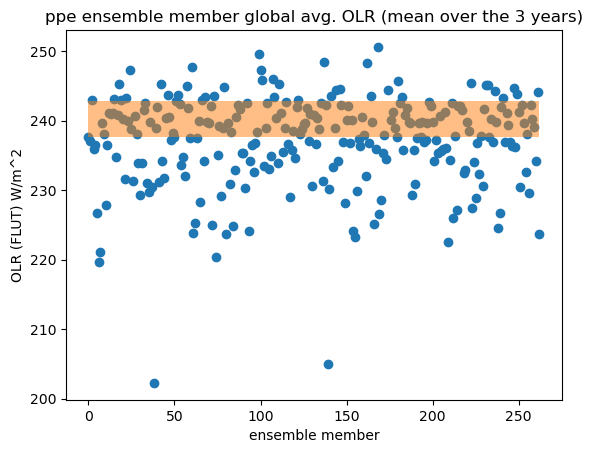

In [17]:
plt.scatter(cam_flut_avg['ensemble'], cam_flut_avg['FLUT'])
plt.fill_between(np.arange(0, 263), ceres_OLR_mean - ceres_cesm2_gap, ceres_OLR_mean + ceres_cesm2_gap, alpha = 0.5)
plt.xlabel('ensemble member')
plt.ylabel('OLR (FLUT) W/m^2')
plt.title('ppe ensemble member global avg. OLR (mean over the 3 years)')
#plt.savefig('ppe_ensemble_avg_OLR.png')

In [18]:
np.count_nonzero((cam_flut_avg['FLUT'] > ceres_OLR_mean - ceres_OLR_sd) &
                 (cam_flut_avg['FLUT'] < ceres_OLR_mean + ceres_OLR_sd))

9

In [19]:
np.count_nonzero((cam_flut_avg['FLUT'] > ceres_OLR_mean - ceres_cesm2_gap) &
                 (cam_flut_avg['FLUT'] < ceres_OLR_mean + ceres_cesm2_gap))

100

In [22]:
flut_good_indx = np.where((cam_flut_avg['FLUT'] >= ceres_OLR_mean - ceres_cesm2_gap) &
                          (cam_flut_avg['FLUT'] <= ceres_OLR_mean + ceres_cesm2_gap))

In [23]:
flut_good_indx

(array([  0,   8,   9,  12,  13,  14,  17,  20,  23,  25,  27,  28,  32,
         33,  36,  39,  40,  45,  47,  49,  51,  53,  58,  64,  69,  70,
         71,  76,  78,  81,  83,  86,  87,  88,  92,  98, 103, 104, 109,
        112, 114, 115, 119, 121, 123, 124, 125, 126, 127, 129, 131, 133,
        134, 135, 138, 143, 147, 150, 151, 153, 159, 160, 165, 172, 175,
        176, 177, 180, 183, 184, 185, 186, 191, 193, 196, 197, 198, 199,
        203, 206, 210, 212, 214, 215, 216, 219, 220, 227, 229, 233, 236,
        239, 242, 243, 249, 251, 252, 254, 256, 257, 258]),)

In [41]:
cam_flut_avg['FLUT'][0]

<xarray.DataArray 'FLUT' ()> Size: 8B
array(237.689722)
Coordinates:
    ensemble  int64 8B 0

In [42]:
ceres_OLR_mean

240.24693

In [11]:
fs.ls('gs://leap-scratch/kylemcevoy')

['leap-scratch/kylemcevoy/cam6_pd_monthly_flut_ppe_ens0_49.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_flut_ppe_ens100_149.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_flut_ppe_ens150_199.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_flut_ppe_ens200_262.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_flut_ppe_ens50_99.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_fsntoa_ppe_0.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_fsntoa_ppe_1.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_fsntoa_ppe_2.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_fsntoa_ppe_3.zarr',
 'leap-scratch/kylemcevoy/cam6_pd_monthly_fsntoa_ppe_4.zarr']

In [21]:
fsntoa_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/cam6_pd_monthly_fsntoa_ppe.zarr')

In [22]:
cam6_fsntoa_ppe = xr.open_dataset(fsntoa_mapper, engine='zarr')

In [23]:
cam6_fsntoa_ppe

<xarray.Dataset> Size: 2GB
Dimensions:   (ensemble: 262, time: 36, lat: 192, lon: 288)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Data variables:
    FSNTOA    (ensemble, time, lat, lon) float32 2GB ...

In [24]:
cosine_weights = np.cos(np.radians(cam6_fsntoa_ppe['lat']))
cam_fsntoa_weighted = cam6_fsntoa_ppe.weighted(cosine_weights)

In [25]:
cam_fsntoa_avg = cam_fsntoa_weighted.mean(dim = ('lat', 'lon'))
cam_fsntoa_avg = cam_fsntoa_avg.mean(dim='time')

In [27]:
cam_fsntoa_avg.to_netcdf('cam6_ppe_fsntoa_avg.nc')

NameError: name 'cam_fsntoa_avg' is not defined

In [28]:
cam_fsntoa_avg = xr.open_dataset('cam6_ppe_fsntoa_avg.nc')

In [29]:
ceres_net_toa_mean = ceres_glob_mean_ann['gtoa_net_all_mon'].sel(year=slice('2001', '2010')).values.mean()

In [30]:
net_toa_avg = cam_flut_avg['FLUT'].values - cam_fsntoa_avg['FSNTOA'].values

In [34]:
good_net_toa_indx = np.where((net_toa_avg < -ceres_net_toa_mean + 5) &
                             (net_toa_avg > -ceres_net_toa_mean - 5))

In [35]:
np.intersect1d(good_net_toa_indx, flut_good_indx)

array([  0,  25,  39,  40,  53,  76,  83, 103, 123, 126, 153, 183, 185,
       196, 212, 219, 233, 236, 252, 257])

In [39]:
ceres_net_toa_mean

0.38894698

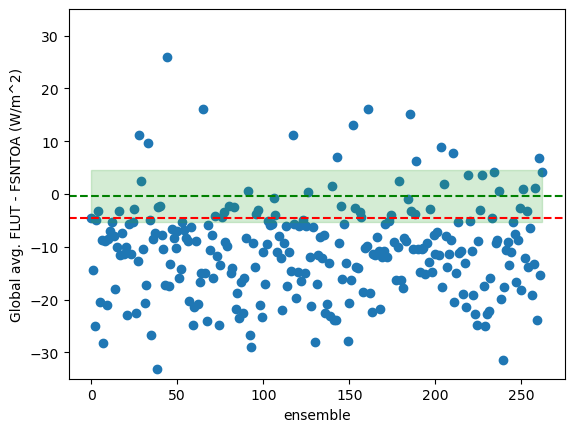

In [38]:
plt.scatter(np.delete(np.arange(263), 175), net_toa_avg)
plt.axhline(net_toa_avg[0], linestyle='--', color = 'red')
plt.axhline(-ceres_net_toa_mean, linestyle='--', color = 'green')
plt.fill_between(np.arange(0, 263), -ceres_net_toa_mean - 5,
                 -ceres_net_toa_mean + 5, alpha = 0.2, color = 'tab:green')
plt.xlabel('ensemble')
plt.ylim([-35,35])
plt.ylabel('Global avg. FLUT - FSNTOA (W/m^2)')
plt.savefig('toa_energy_imba_attempt.png')

In [29]:
cam_flut_avg

<xarray.Dataset> Size: 4kB
Dimensions:   (ensemble: 262)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
Data variables:
    FLUT      (ensemble) float64 2kB 237.7 237.1 242.9 ... 234.2 244.1 223.7

In [28]:
cam_fsntoa_avg - cam_flut_avg

<xarray.Dataset> Size: 2kB
Dimensions:   (ensemble: 262)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
Data variables:
    *empty*

In [28]:
ceres_glob_mean_ann

NameError: name 'ceres_glob_mean_ann' is not defined

Text(0.5, 1.0, 'ppe ensemble member global avg. OLR (mean over the 3 years)')

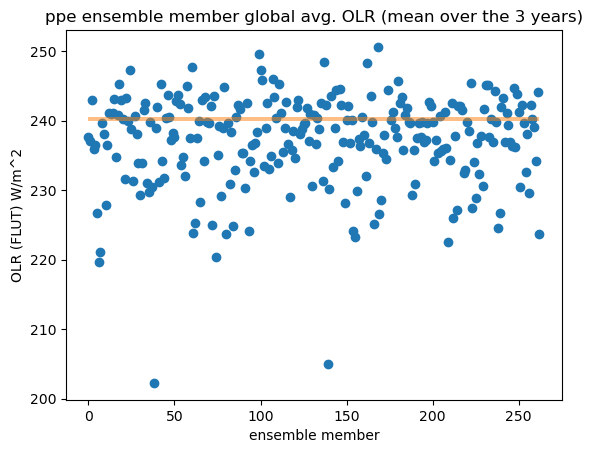

In [21]:
plt.scatter(cam_fsntoa_avg['ensemble'], cam_fsntoa_avg['FLUT'])
plt.fill_between(np.arange(0, 263), ceres_OLR_mean - ceres_OLR_sd, ceres_OLR_mean + ceres_OLR_sd, alpha = 0.5)
plt.xlabel('ensemble member')
plt.ylabel('OLR (FLUT) W/m^2')
plt.title('ppe ensemble member global avg. OLR (mean over the 3 years)')
#plt.savefig('ppe_ensemble_avg_OLR.png')